# Sosyal Medya Kullanım Alışkanlıkları ile Bağımlılık Skoru (Addicted_Score) Tahmini  
Bu proje, öğrencilerin sosyal medya kullanım alışkanlıklarına dayalı olarak sosyal medya bağımlılık skorlarını (1-10) tahmin etmeyi amaçlamaktadır.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
df.shape

(705, 13)

# EDA

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


# Veride Eksiklik yok ayrıca hem numerik hem kategorik değişkenler var

In [ ]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


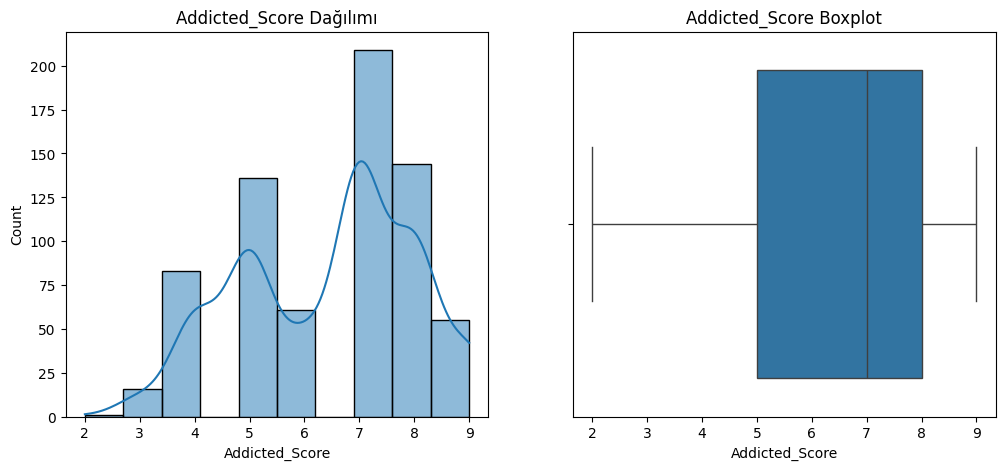

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Addicted_Score'], bins=10, kde=True)
plt.title('Addicted_Score Dağılımı')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Addicted_Score'])
plt.title('Addicted_Score Boxplot')

plt.show()


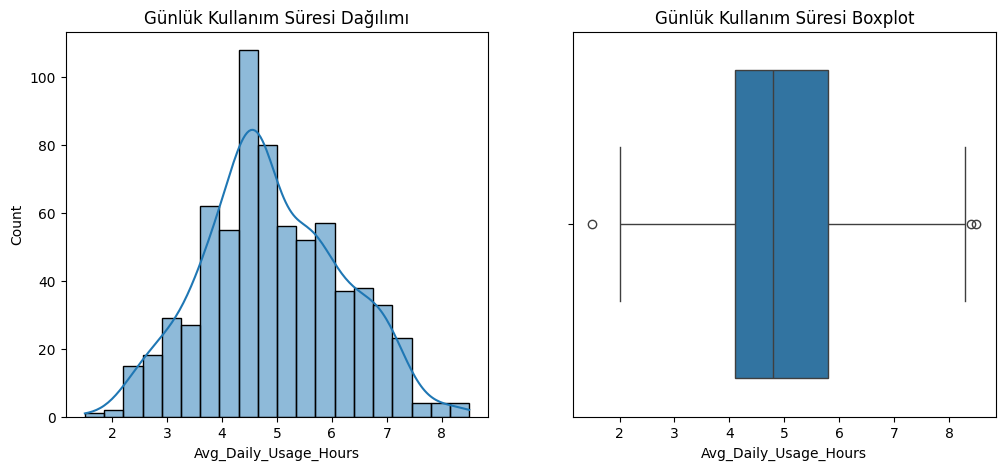

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=20, kde=True)
plt.title('Günlük Kullanım Süresi Dağılımı')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Avg_Daily_Usage_Hours'])
plt.title('Günlük Kullanım Süresi Boxplot')

plt.show()


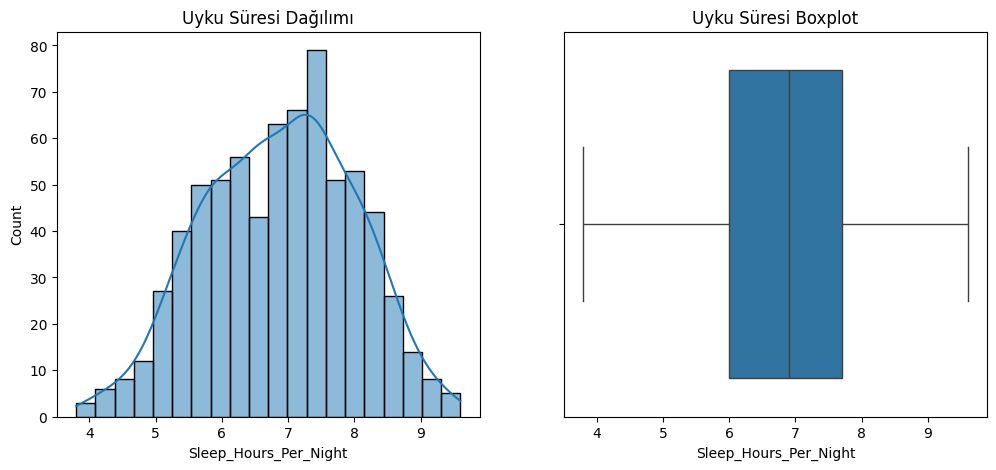

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sleep_Hours_Per_Night'], bins=20, kde=True)
plt.title('Uyku Süresi Dağılımı')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Sleep_Hours_Per_Night'])
plt.title('Uyku Süresi Boxplot')

plt.show()


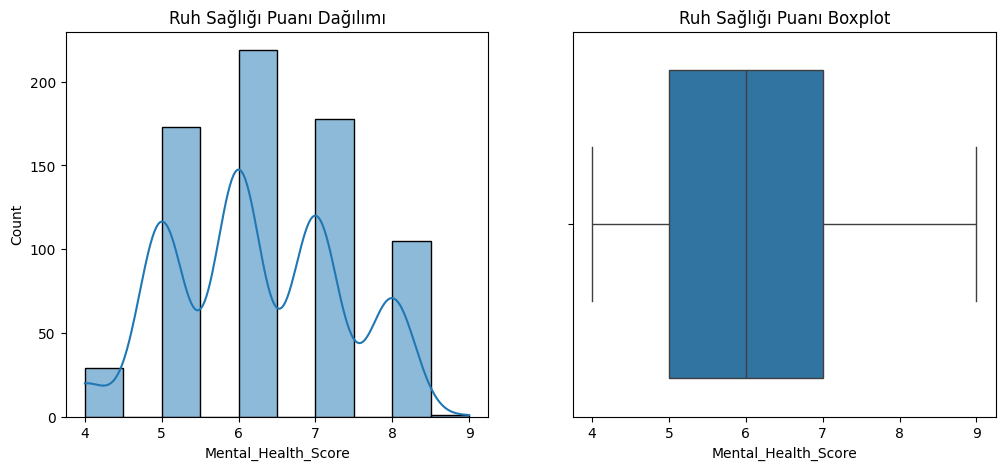

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Mental_Health_Score'], bins=10, kde=True)
plt.title('Ruh Sağlığı Puanı Dağılımı')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Mental_Health_Score'])
plt.title('Ruh Sağlığı Puanı Boxplot')

plt.show()


* ✅ Veri Seti Genel Olarak Temiz: Uç değerler sadece Avg_Daily_Usage_Hours değişkeninde belirgin. Özellikle 8+ saatlik kullanımlar modelin performansını bozabilir (istersek uç değer filtrelemesi uygulayabiliriz).
* ✅ Dağılımlar Dengeli: Addicted_Score, Sleep_Hours_Per_Night, Mental_Health_Score düzgün dağılmış ve uç değer içermiyor.
* ✅ Güçlü Öznitelikler: Kullanım süresi, uyku süresi ve ruh sağlığı puanı bağımlılık skorunu tahmin etmek için güçlü adaylar.

# Uç Değer Analizi

In [ ]:
def outlier_info(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column}: {len(outliers)} uç değer var.")
    return outliers

outlier_avg_daily_usage = outlier_info('Avg_Daily_Usage_Hours')
outlier_sleep = outlier_info('Sleep_Hours_Per_Night')
outlier_mental_health = outlier_info('Mental_Health_Score')
outlier_addicted = outlier_info('Addicted_Score')


Avg_Daily_Usage_Hours: 3 uç değer var.
Sleep_Hours_Per_Night: 0 uç değer var.
Mental_Health_Score: 0 uç değer var.
Addicted_Score: 0 uç değer var.


In [ ]:
# Uç değerleri çıkaralım iqr'a göre
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_clean = remove_outliers('Avg_Daily_Usage_Hours')


# Kategorik Değişkenleri İşleme

Kategorik değişkenler şunlar:

* Gender

* Academic_Level

* Country

* Most_Used_Platform

* Relationship_Status

* Affects_Academic_Performance

In [ ]:
categorical_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Relationship_Status', 'Affects_Academic_Performance']

for col in categorical_cols:
    print(f"{col} unique values:\n{df[col].unique()}\n")


Gender unique values:
['Female' 'Male']

Academic_Level unique values:
['Undergraduate' 'Graduate' 'High School']

Country unique values:
['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia'
 'Georgia' 'Azerbaijan' 'C

In [ ]:
# Kategorik kolonlar ve dönüşümler
categorical_cols = ['Gender', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status', 'Affects_Academic_Performance']
print("Kategorik değişkenler:", categorical_cols)

def standardize_data(inp_df):

    inp_df['Gender'] = inp_df['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)

    inp_df['Academic_Level'] = inp_df['Academic_Level'].replace(
        {'High School': 0, 'Undergraduate': 1, 'Graduate': 2}
    ).astype(int)

    inp_df['Relationship_Status'] = inp_df['Relationship_Status'].replace(
        {'Single': 0, 'In Relationship': 1, 'Complicated': 2}
    ).astype(int)

    inp_df['Affects_Academic_Performance'] = inp_df['Affects_Academic_Performance'].replace(
        {'No': 0, 'Yes': 1}
    ).astype(int)

    return inp_df

df_encoded = standardize_data(df)

df_encoded = pd.get_dummies(df_encoded, columns=['Most_Used_Platform'], prefix='Platform')

df_encoded.head(9)


Kategorik değişkenler: ['Gender', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status', 'Affects_Academic_Performance']


<ipython-input-13-2182b18e48b7>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inp_df['Gender'] = inp_df['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)
<ipython-input-13-2182b18e48b7>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inp_df['Academic_Level'] = inp_df['Academic_Level'].replace(
<ipython-input-13-2182b18e48b7>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,...,Platform_KakaoTalk,Platform_LINE,Platform_LinkedIn,Platform_Snapchat,Platform_TikTok,Platform_Twitter,Platform_VKontakte,Platform_WeChat,Platform_WhatsApp,Platform_YouTube
0,1,19,0,1,Bangladesh,5.2,1,6.5,6,1,...,False,False,False,False,False,False,False,False,False,False
1,2,22,1,2,India,2.1,0,7.5,8,0,...,False,False,False,False,False,True,False,False,False,False
2,3,20,0,1,USA,6.0,1,5.0,5,2,...,False,False,False,False,True,False,False,False,False,False
3,4,18,1,0,UK,3.0,0,7.0,7,0,...,False,False,False,False,False,False,False,False,False,True
4,5,21,1,2,Canada,4.5,1,6.0,6,1,...,False,False,False,False,False,False,False,False,False,False
5,6,19,0,1,Australia,7.2,1,4.5,4,2,...,False,False,False,False,False,False,False,False,False,False
6,7,23,1,2,Germany,1.5,0,8.0,9,0,...,False,False,True,False,False,False,False,False,False,False
7,8,20,0,1,Brazil,5.8,1,6.0,6,1,...,False,False,False,True,False,False,False,False,False,False
8,9,18,1,0,Japan,4.0,0,6.5,7,0,...,False,False,False,False,True,False,False,False,False,False


### boolean gelenleri düzeltelim

In [ ]:
boolean_cols = df_encoded.select_dtypes(include=['bool']).columns.tolist()
print("Boolean kolonlar:", boolean_cols)

Boolean kolonlar: ['Platform_Facebook', 'Platform_Instagram', 'Platform_KakaoTalk', 'Platform_LINE', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_TikTok', 'Platform_Twitter', 'Platform_VKontakte', 'Platform_WeChat', 'Platform_WhatsApp', 'Platform_YouTube']


In [ ]:
# Boolean dönüşüm yapmamız gerek
for col in boolean_cols:
    df_encoded[col] = df_encoded[col].astype(int)

In [ ]:
df_encoded.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,...,Platform_KakaoTalk,Platform_LINE,Platform_LinkedIn,Platform_Snapchat,Platform_TikTok,Platform_Twitter,Platform_VKontakte,Platform_WeChat,Platform_WhatsApp,Platform_YouTube
0,1,19,0,1,Bangladesh,5.2,1,6.5,6,1,...,0,0,0,0,0,0,0,0,0,0
1,2,22,1,2,India,2.1,0,7.5,8,0,...,0,0,0,0,0,1,0,0,0,0
2,3,20,0,1,USA,6.0,1,5.0,5,2,...,0,0,0,0,1,0,0,0,0,0
3,4,18,1,0,UK,3.0,0,7.0,7,0,...,0,0,0,0,0,0,0,0,0,1
4,5,21,1,2,Canada,4.5,1,6.0,6,1,...,0,0,0,0,0,0,0,0,0,0


# Target Mean Encoding (Country için)

In [ ]:
from sklearn.model_selection import train_test_split

target = 'Addicted_Score'

X = df_encoded.drop(columns=[target], errors='ignore')  # Hedef kolon henüz yoksa hata verme
y = df[target] if target in df.columns else None
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    train = X_train.copy()
    train[target] = y_train
    test = X_test.copy()
    test[target] = y_test
else:
    train = df_encoded
    test = df_encoded

# Target Mean Encoding 
def target_mean_encoding(train_df, test_df, target_col, cat_col):
    means = train_df.groupby(cat_col)[target_col].mean()
    global_mean = train_df[target_col].mean()
    train_df[cat_col + '_encoded'] = train_df[cat_col].map(means)
    test_df[cat_col + '_encoded'] = test_df[cat_col].map(means)
    test_df[cat_col + '_encoded'] = test_df[cat_col + '_encoded'].fillna(global_mean)
    return train_df, test_df

train_encoded, test_encoded = target_mean_encoding(train, test, target, 'Country')

train_encoded = train_encoded.drop(columns=['Country'])
test_encoded = test_encoded.drop(columns=['Country'])


# Korelasyon Matrisi

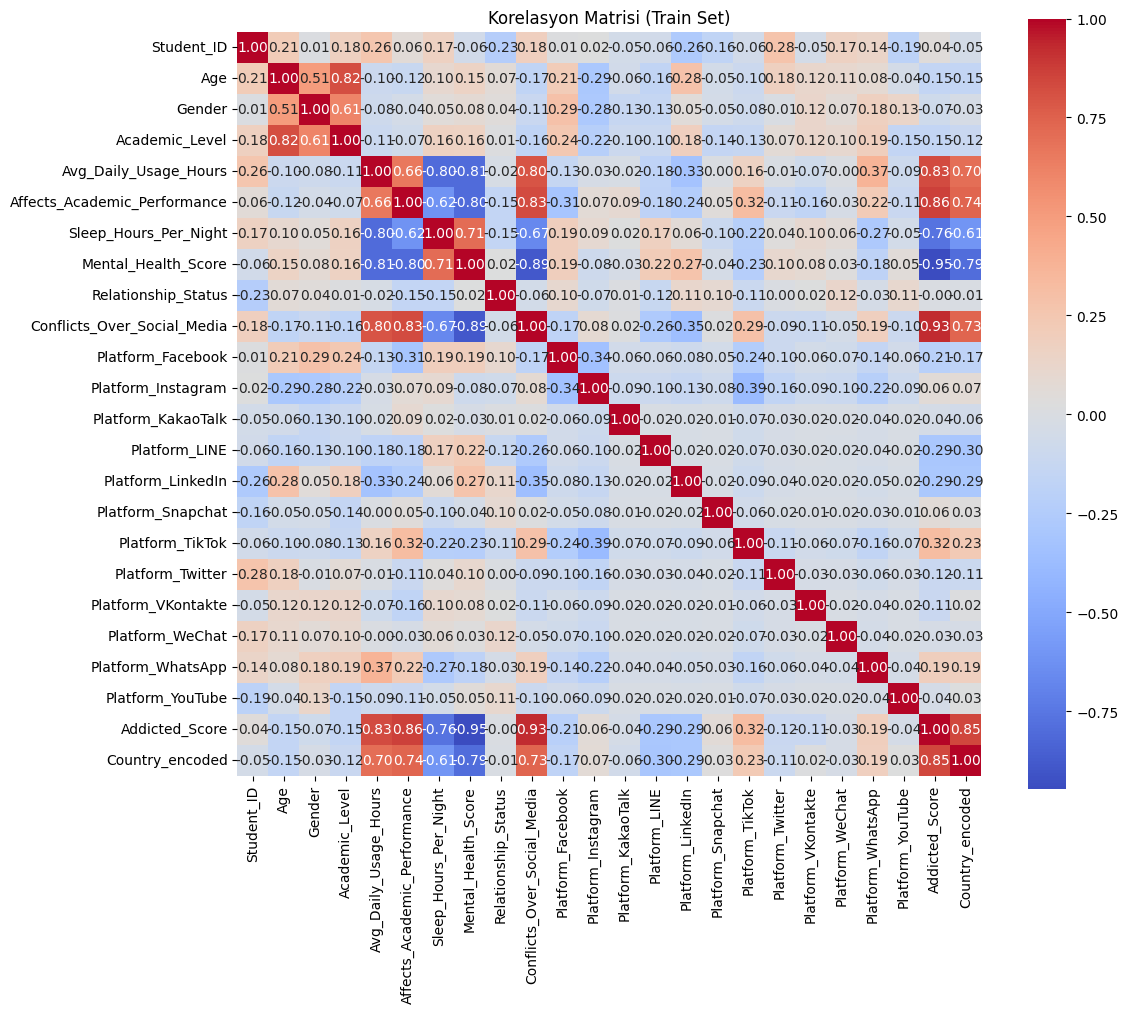

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Train set için korelasyon matrisi
plt.figure(figsize=(12,10))
corr_matrix = train_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korelasyon Matrisi (Train Set)')
plt.show()


# Yorumlaması:

Addicted_Score – Conflicts_Over_Social_Media: Korelasyon ≈ 0.83

* Sosyal medya bağımlılığı ile ilişki çatışmaları güçlü şekilde pozitif ilişkili.

* Yani bağımlılık arttıkça ilişki sorunları da artıyor.

Addicted_Score – Avg_Daily_Usage_Hours: Korelasyon ≈ 0.76

* Sosyal medya bağımlılığı ve günlük kullanım süresi arasında güçlü pozitif ilişki var.

* Günlük kullanım süresi arttıkça bağımlılık skoru da yükseliyor.

Addicted_Score – Sleep_Hours_Per_Night: Korelasyon ≈ -0.76

* Negatif güçlü ilişki. Daha yüksek bağımlılık daha az uyku anlamına geliyor.

* Addicted_Score – Mental_Health_Score: Korelasyon ≈ -0.67

Sosyal medya bağımlılığı ve ruh sağlığı arasında güçlü negatif ilişki.

* Yani bağımlılık arttıkça ruh sağlığı puanı düşüyor.

* Addicted_Score – Country_encoded: Korelasyon ≈ 0.74

Ülkeye göre bağımlılık skorunda anlamlı farklılıklar olabilir. Target mean encoding bunu açıklıyor.

* Addicted_Score – Relationship_Status: Korelasyon ≈ 0.10

* Çok zayıf ilişki var. İlişki durumu bağımlılığı pek etkilemiyor.

Addicted_Score – Platform_X: Korelasyonlar genel olarak düşük (0.1 civarı)

* En çok kullanılan platformlar bağımlılığı belirlemek için zayıf değişken olabilir.



# Model Denemeleri

In [ ]:
!pip install catboost
!pip install xgboost
!pip install lightgbm
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Özellik ve hedef
X_train_model = train_encoded.drop(columns=['Addicted_Score', 'Student_ID'])
y_train_model = train_encoded['Addicted_Score']
X_test_model = test_encoded.drop(columns=['Addicted_Score', 'Student_ID'])
y_test_model = test_encoded['Addicted_Score']

# Modeller
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'XGBoost': XGBRegressor(verbosity=0, random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'HistGBR': HistGradientBoostingRegressor(random_state=42)
}

# Sonuçlar
results = {}

for name, model in models.items():
    model.fit(X_train_model, y_train_model)
    preds = model.predict(X_test_model)
    rmse = np.sqrt(mean_squared_error(y_test_model, preds))
    r2 = r2_score(y_test_model, preds)
    results[name] = {'RMSE': rmse, 'R2': r2}

for name, metrics in results.items():
    print(f"{name}: RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 15
[LightGBM] [Info] Start training from score 6.453901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

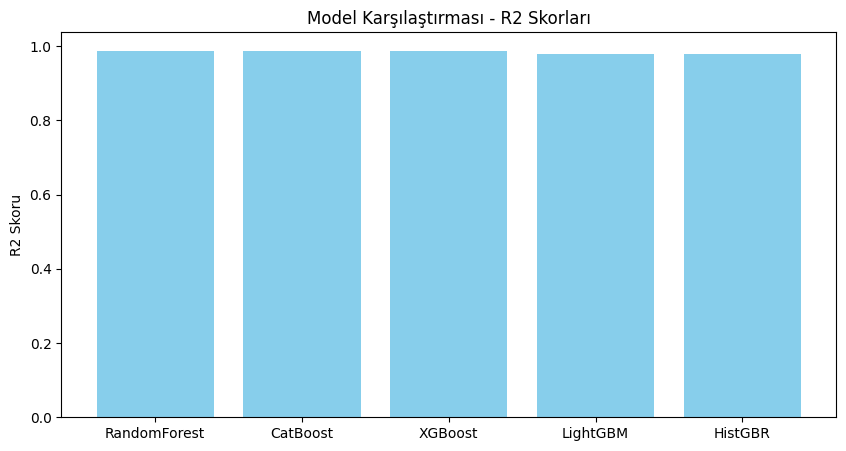

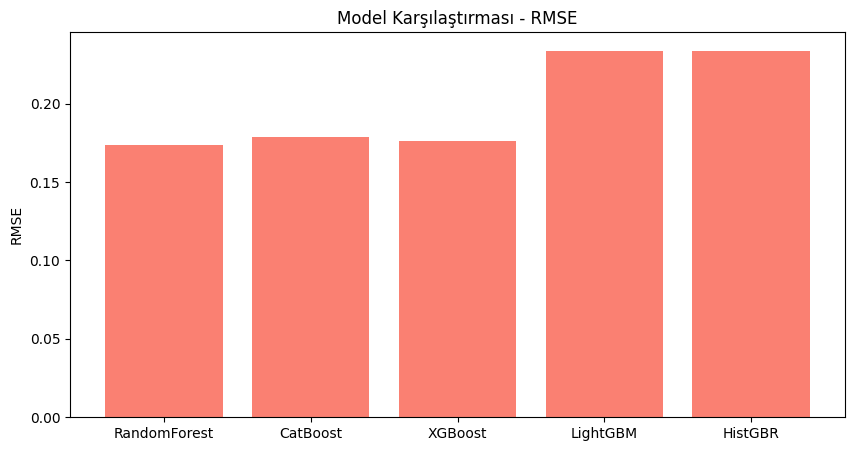

In [ ]:
import matplotlib.pyplot as plt

# Bar chart için veri
names = list(results.keys())
r2_scores = [results[name]['R2'] for name in names]
rmse_scores = [results[name]['RMSE'] for name in names]

# R2 Skorları
plt.figure(figsize=(10,5))
plt.bar(names, r2_scores, color='skyblue')
plt.ylabel('R2 Skoru')
plt.title('Model Karşılaştırması - R2 Skorları')
plt.show()

# RMSE Skorları
plt.figure(figsize=(10,5))
plt.bar(names, rmse_scores, color='salmon')
plt.ylabel('RMSE')
plt.title('Model Karşılaştırması - RMSE')
plt.show()


* Tüm modeller güçlü performans sergiliyor, çünkü veri seti iyi özelliklere sahip ve muhtemelen hedef değişkenle korelasyonları yüksek (özellikle kullanım süresi, ilişki çatışması, uyku vs).

* En iyi model: **CatBoost** veya **RandomForest**

# Optuna ile CatBoost hiperparametre tuning

## Tüm modeller base konfigürasyonlarda test edildi. CatBoost en iyi sonucu verdi (RMSE=0.178, R²=0.987). Bulduğumuz en iyi parametrelerle CatBoost’u yeniden eğiteceğiz.

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

# Optuna ile CatBoost tuning
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': 0,
        'random_state': 42
    }
    model = CatBoostRegressor(**params)
    score = cross_val_score(model, X_train_model, y_train_model, scoring='neg_root_mean_squared_error', cv=3).mean()
    return score

print("Optuna CatBoost tuning başlıyor...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print("En iyi CatBoost parametreleri:", study.best_params)

# CatBoost'u en iyi parametrelerle yeniden eğiticez
best_catboost = CatBoostRegressor(**study.best_params, verbose=0, random_state=42)
best_catboost.fit(X_train_model, y_train_model)
preds = best_catboost.predict(X_test_model)
rmse = np.sqrt(mean_squared_error(y_test_model, preds))
r2 = r2_score(y_test_model, preds)
print(f"En iyi CatBoost tuning sonucu: RMSE={rmse:.3f}, R2={r2:.3f}")


[I 2025-06-01 01:01:42,832] A new study created in memory with name: no-name-2b7cfe39-baa1-48e0-a44e-1423d3f24c2f


Optuna CatBoost tuning başlıyor...


<ipython-input-23-029d594c485c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
[I 2025-06-01 01:01:44,017] Trial 0 finished with value: -0.29393029826306205 and parameters: {'depth': 8, 'learning_rate': 0.024894646646534957, 'iterations': 332, 'l2_leaf_reg': 9.689374793611782, 'random_strength': 9.065217084536556, 'bagging_temperature': 0.10515587038377483}. Best is trial 0 with value: -0.29393029826306205.
<ipython-input-23-029d594c485c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
[I 2025-06-01 01:01:45,508] Trial 1 finish

En iyi CatBoost parametreleri: {'depth': 5, 'learning_rate': 0.17539028909145385, 'iterations': 408, 'l2_leaf_reg': 7.228720908017028, 'random_strength': 0.14369544845120913, 'bagging_temperature': 0.7940234559969715}
En iyi CatBoost tuning sonucu: RMSE=0.176, R2=0.988


* Optuna tuning ile performans artışı çok küçük ama var (RMSE farkı ≈ 0.001).
* Bu küçük fark, veri setinin zaten iyi düzenlenmiş olmasından kaynaklanabilir.
* Hiperparametre tuning, genellikle büyük veri setlerinde ve karmaşık modellerde daha belirgin fark yaratır.

# Modeli Kaydedelim

In [ ]:
import joblib

# CatBoost modelini en iyi parametrelerle eğitmiştik
joblib.dump(best_catboost, 'best_catboost_model.pkl')
print("Model başarıyla kaydedildi: best_catboost_model.pkl")

Model başarıyla kaydedildi: best_catboost_model.pkl


# Feature Importance

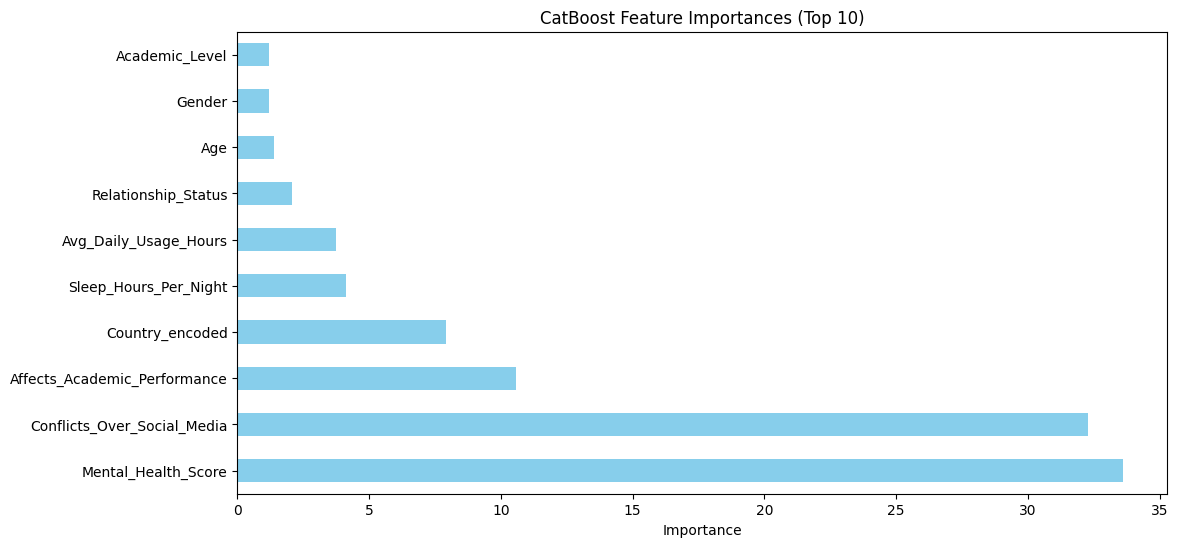

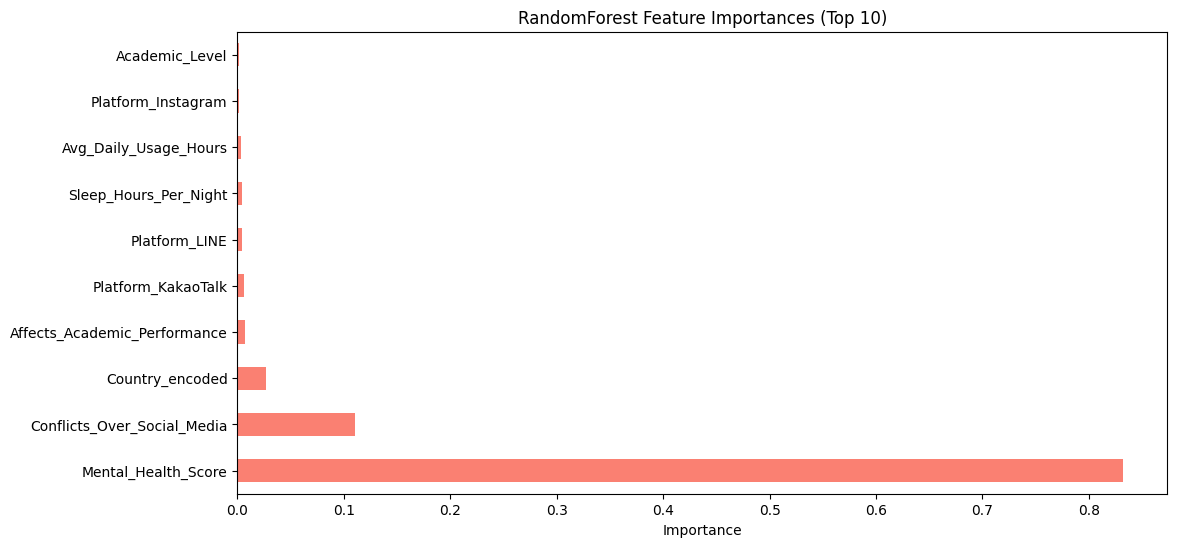

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Özellik isimleri
feature_names = X_train_model.columns.tolist()

# CatBoost Feature Importance
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train_model, y_train_model)
catboost_importances = pd.Series(catboost_model.feature_importances_, index=feature_names)

# RandomForest Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_model, y_train_model)
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_names)

# Görselleştirme
plt.figure(figsize=(12, 6))
catboost_importances.sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue')
plt.title('CatBoost Feature Importances (Top 10)')
plt.xlabel('Importance')
plt.show()

plt.figure(figsize=(12, 6))
rf_importances.sort_values(ascending=False).head(10).plot(kind='barh', color='salmon')
plt.title('RandomForest Feature Importances (Top 10)')
plt.xlabel('Importance')
plt.show()


# Sonuçlar :
## CatBoost daha dengeli ve birçok değişkenin etkisini dikkate almış.

## RandomForest ise Mental_Health_Score’a çok fazla ağırlık vermiş. Bu, modelin fazla bağımlı olabileceğini gösteriyor.

## Sonuç: CatBoost’un özelliği daha çeşitli ve güvenilir; RandomForest ise belki overfitting’e daha yatkın.
